In [ ]:
!pip install geopandas
!pip install contextily

In [2]:
import geopandas
import pandas as pd
import contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
confini = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Reg01012021_g")
confini

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


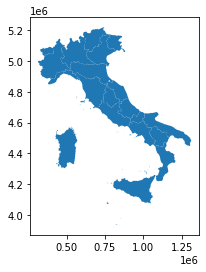

In [5]:
confini.plot()

visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia

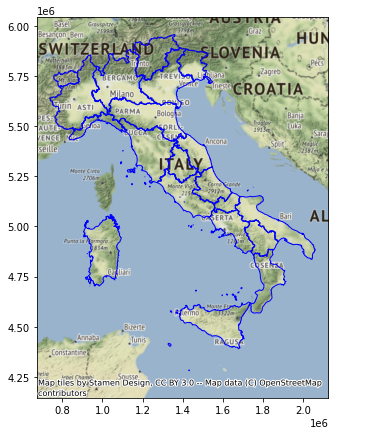

In [6]:
ax = confini.to_crs(epsg=3857).plot(figsize =(10,7), facecolor="none", edgecolor = "blue")
contextily.add_basemap(ax)

sostituire alla cartina geografica dell'Italia un altro tipo di mappa

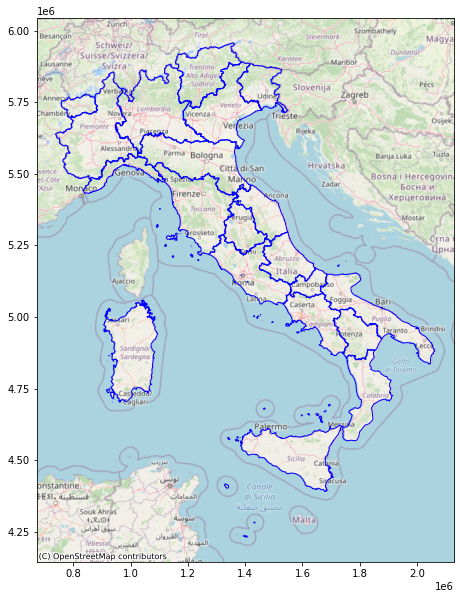

In [7]:
ax = confini.to_crs(epsg=3857).plot(figsize=(12,10), facecolor= "none", edgecolor = "b")
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

visualizzare le province della Lombardia su una mappa di contextily

In [10]:
province = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/ProvCM01012021_g")
province

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


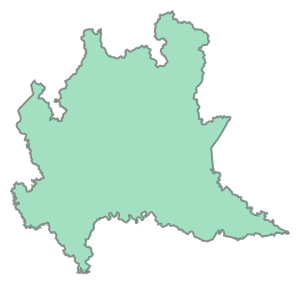

In [11]:
lombardia = confini.loc[confini['DEN_REG'] == 'Lombardia', 'geometry'].squeeze()
lombardia

In [12]:
proLomb = province[province.within(lombardia)]
proLomb

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
11,1,3,12,0,12,Varese,-,Varese,VA,Provincia,246016.658456,1.199334e+09,"POLYGON ((483071.566 5104606.092, 483258.471 5..."
12,1,3,13,0,13,Como,-,Como,CO,Provincia,260565.230534,1.279301e+09,"MULTIPOLYGON (((498077.207 5089780.202, 497614..."
13,1,3,14,0,14,Sondrio,-,Sondrio,SO,Provincia,464265.098278,3.194949e+09,"POLYGON ((595652.358 5163515.659, 596042.420 5..."
14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09,"MULTIPOLYGON (((538136.289 5004372.814, 539162..."
15,1,3,16,0,16,Bergamo,-,Bergamo,BG,Provincia,310847.260446,2.754672e+09,"POLYGON ((585288.233 5104483.085, 585414.669 5..."
16,1,3,17,0,17,Brescia,-,Brescia,BS,Provincia,446387.375203,4.787545e+09,"POLYGON ((615296.024 5132340.876, 615374.024 5..."
17,1,3,18,0,18,Pavia,-,Pavia,PV,Provincia,449504.645144,2.967086e+09,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
18,1,3,19,0,19,Cremona,-,Cremona,CR,Provincia,365500.445250,1.769382e+09,"POLYGON ((542189.537 5037362.585, 542408.347 5..."
19,1,3,20,0,20,Mantova,-,Mantova,MN,Provincia,386685.850910,2.341796e+09,"POLYGON ((630538.958 5031669.589, 632819.864 5..."
96,1,3,97,0,97,Lecco,-,Lecco,LC,Provincia,181294.401343,8.056511e+08,"POLYGON ((532079.618 5104664.092, 533286.608 5..."


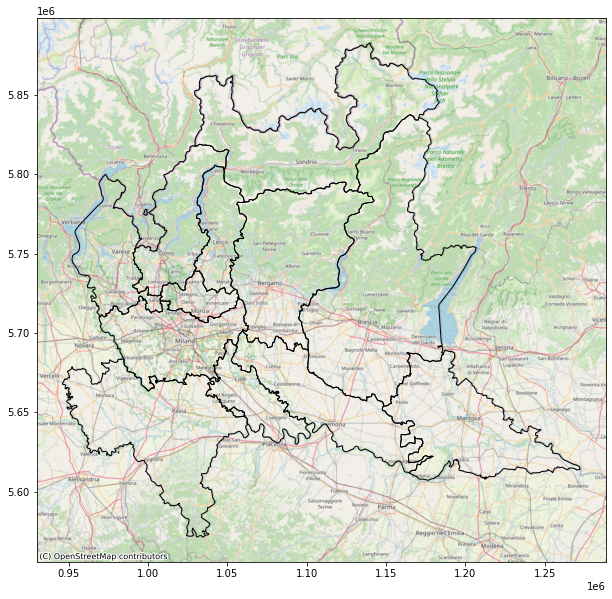

In [13]:
ax = proLomb.to_crs(epsg=3857).plot(figsize=(20,10), facecolor= "none", edgecolor= "k")
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti

In [14]:
comuni = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Com01012021_g")
comuni

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,1001,001001,AgliÃ¨,None,0,16097.848297,1.330696e+07,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,1,1,1,201,201,1002,001002,Airasca,None,0,16684.218599,1.595353e+07,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,1,1,1,201,201,1003,001003,Ala di Stura,None,0,29892.674582,4.575189e+07,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,1,1,1,201,201,1004,001004,Albiano d'Ivrea,None,0,16192.656480,1.103356e+07,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,1,1,1,201,201,1006,001006,Almese,None,0,16077.245089,1.771710e+07,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,5,20,111,0,111,111103,111103,Villaputzu,None,0,100515.537851,1.807260e+08,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,5,20,111,0,111,111104,111104,Villasalto,None,0,58635.095264,1.303933e+08,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,5,20,111,0,111,111105,111105,Villasimius,None,0,49735.818257,5.759282e+07,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,5,20,111,0,111,111106,111106,Villasor,None,0,53375.684321,8.640693e+07,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


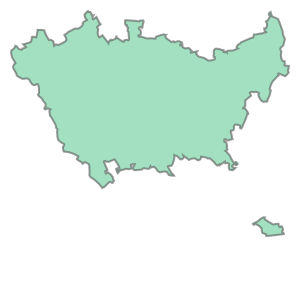

In [15]:
milano = province.loc[province['DEN_CM'] == 'Milano', 'geometry'].squeeze()
milano

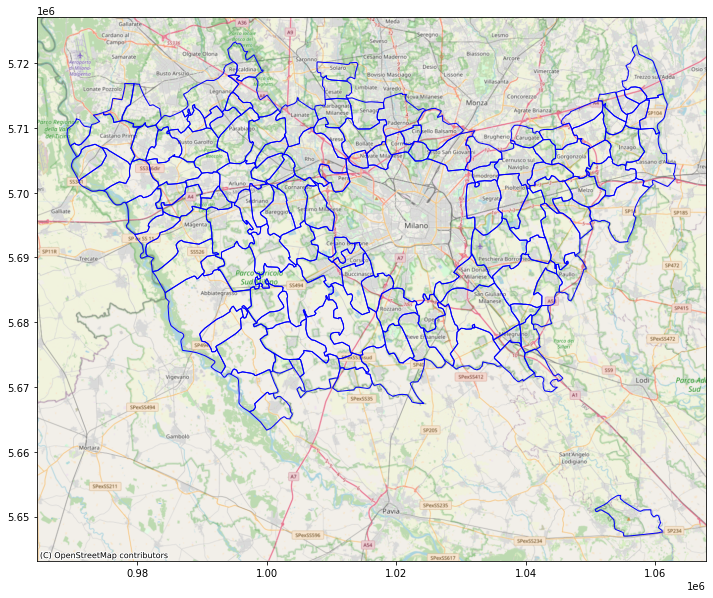

In [16]:
comuniDiMilano = comuni[comuni.within(milano)]
ax = comuniDiMilano.to_crs(epsg= 3857).plot(figsize= (12,15), facecolor = "none", edgecolor = "b")
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri.

In [19]:
quartieri = geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm (1).zip")
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


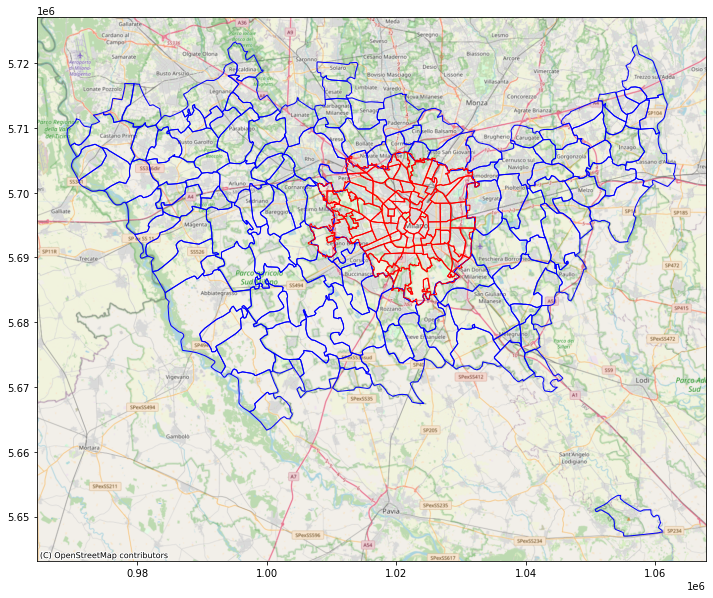

In [20]:
ax = comuniDiMilano.to_crs(epsg= 3857).plot(figsize= (12,15), facecolor = "none", edgecolor = "b")
quartieri.to_crs(epsg= 3857).plot(ax=ax, facecolor = "none", edgecolor= "red")
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.

In [ ]:
input_prov= input("Inserisci una provincia: ")

si = province[province["DEN_UTS"] == input_prov].geometry.squeeze()

if si.within(lombardia) == True: 
  ax = province[province.touches(si) & province.within(lombardia)].to_crs(epsg=3857).plot(figsize=(12,10), alpha = 0.3 , edgecolor = "red")
  contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)
else:
  print("La provincia non si trova all'interno della Regione Lombardia")